## Building a Feed forward NN on images (MNIST image classification)

In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [ ]:
## device config

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)

## hyperparameters


In [ ]:
28*28

In [3]:
input_size = 784 ## input image is 28*28 grayscale 1 channel
hidden_size = 100
num_classes = 10 ## digits 0-9


In [4]:
num_epochs = 2
learning_rate = 0.001
batch_size = 100

## loading data , use dataset and dataloader

### uses MNIST dadtaset in torchvison.datasets, applies ToTensor() transforms

In [5]:
train_dataset = torchvision.datasets.MNIST(root='./data/', 
                                           train=True, transform=transforms.ToTensor(),download=True)

In [6]:
test_dataset = torchvision.datasets.MNIST(root='./data/', 
                                           train=False, transform=transforms.ToTensor(),download=True)

In [ ]:
len(train_dataset)

In [ ]:
len(test_dataset)

In [ ]:
train_dataset[0][0].shape

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
len(train_loader) ## 600 because 60000 samples / 100 batch size = 600 steps per epoch

In [8]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
examples = iter(train_loader)
samples, labels = next(examples)

In [ ]:
samples.shape ## 100 samples , 1 channel, 28 * 28

In [ ]:
labels.shape

In [ ]:
type(samples[0][0])

## lets plot the first 6 samples

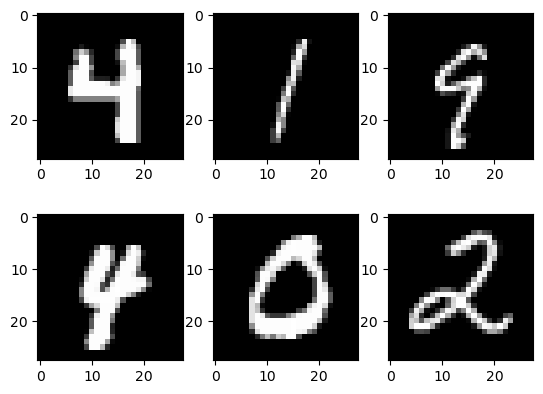

In [10]:
for i in range(0, 6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray') ## first channel - show in gray color
    
plt.show()
    

## Define the Model

In [11]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        
        ## first input to hidden layer
        self.lin1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        
        ## second layer - hidden layer to output
        self.lin2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        
        out = self.lin1(x)
        out = self.relu(out)
        out = self.lin2(out) ## This gives num_classes output logits. Since we are going to use nn.CrossEntropy, no need for softmax, that is internally applied
        return out

In [12]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

## Loss and optimizer

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
type(criterion)

torch.nn.modules.loss.CrossEntropyLoss

## Training loop

In [15]:
n_total_steps_per_epoch = len(train_loader)  ## no of steps / epoch (total no of samples/batch size)

In [16]:
for epoch in range(num_epochs):
    for i , (images, labels) in enumerate(train_loader):
        ## images need to be reshaped from n_samples,1,28,28 to n_samples, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        ## forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        ## backward
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        ##print
        if (i+1)%100==0:
            print(f'epoch : {epoch + 1}/{num_epochs}, step : {i+1/n_total_steps_per_epoch}, loss : {loss.item():.4f} ')
        

epoch : 1/2, step : 99.00166666666667, loss : 0.5357 
epoch : 1/2, step : 199.00166666666667, loss : 0.4039 
epoch : 1/2, step : 299.00166666666667, loss : 0.2170 
epoch : 1/2, step : 399.00166666666667, loss : 0.3355 
epoch : 1/2, step : 499.00166666666667, loss : 0.1513 
epoch : 1/2, step : 599.0016666666667, loss : 0.1614 
epoch : 2/2, step : 99.00166666666667, loss : 0.2808 
epoch : 2/2, step : 199.00166666666667, loss : 0.1925 
epoch : 2/2, step : 299.00166666666667, loss : 0.2371 
epoch : 2/2, step : 399.00166666666667, loss : 0.2002 
epoch : 2/2, step : 499.00166666666667, loss : 0.1592 
epoch : 2/2, step : 599.0016666666667, loss : 0.1464 


## testing

In [ ]:
with torch.no_grad():
    n_samples = 0
    n_correct = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
    output = model(images)
    _, predictions = torch.max(output,1) ## predictions is the index/label
    
    n_samples = n_samples + labels.shape[0]
    n_correct = n_correct + (predictions==labels).sum().item()
    
    acc = 100.0 * n_correct/n_samples
    
    print(f'accuracy = {acc}')
    
    